
E-commerce companies like Amazon , flipkart uses different recommendation systems to provide suggestions to the customers.Amazon uses currently item-item collaberrative filtering, which scales to massive datasets and produces high quality recommendation system in the real time. This system is a kind of a information filtering system which seeks to predict the "rating" or preferences which user is interested in.

# Types of recommendations

There are mainly 6 types of the recommendations systems :-

1. Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.
2. Classification model based:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is     interested or not in the prodcut.
3. Content based recommedations:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.
4. Collaberative Filtering:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types:
 a) User-User
 b) Item -Item

5. Hybrid Approaches:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .
6. Association rule mining :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions.

# 1. Import the libraries

In [1]:
#import the reqired libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
# from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# 2. Load the dataset and add headers

In [2]:
data = pd.read_csv("/content/ratings_Electronics (1).csv")
print(data.head())

    AKM1MP6P0OYPR  0132793040  5.0  1365811200
0  A2CX7LUOHB2NDG  0321732944  5.0  1341100800
1  A2NWSAGRHCP8N5  0439886341  1.0  1367193600
2  A2WNBOD3WNDNKT  0439886341  3.0  1374451200
3  A1GI0U4ZRJA8WN  0439886341  1.0  1334707200
4  A1QGNMC6O1VW39  0511189877  5.0  1397433600


Assigning column names

In [3]:
data.columns=['userId', 'productId', 'ratings','timestamp']

In [4]:
data.head()

,userId,productId,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


# Dataset Information:
Amazon electronics dataset. Source:Kaggle

---



● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating

# **EDA**

Dropping the timestamp column

In [5]:
data.drop('timestamp',axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   ratings    float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [7]:
#Check the number of rows and columns
rows,columns=data.shape
print('Number of rows: ',rows)
print('Number of columns: ',columns)

Number of rows:  7824481
Number of columns:  3


In [8]:
#Check the datatypes
data.dtypes

userId        object
productId     object
ratings      float64
dtype: object

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824481.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


Since the dataset is too large we will take a subset of the the data set

In [10]:
#Taking subset of the dataset
df=data[:10000]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     10000 non-null  object 
 1   productId  10000 non-null  object 
 2   ratings    10000 non-null  float64
dtypes: float64(1), object(2)
memory usage: 234.5+ KB


In [12]:
#Summary statistics of rating variable
df['ratings'].describe()

count    10000.000000
mean         3.919800
std          1.467373
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: ratings, dtype: float64

Ratings in dataset are from 1 to 5

 Handling Missing values

In [13]:
#Check for missing values
df.isnull().sum()

userId       0
productId    0
ratings      0
dtype: int64

* There are no missing records in the dataset.

## Ratings

<Axes: xlabel='ratings', ylabel='count'>

Text(0.5, 0, 'Ratings')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Count Plot of Ratings')

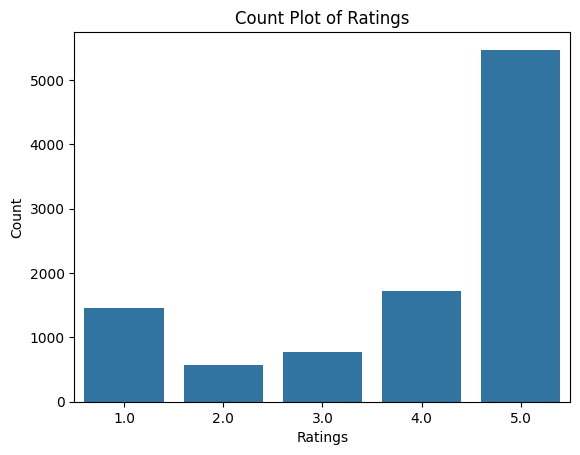

In [14]:

sns.countplot(data=df, x='ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Count Plot of Ratings')
plt.show()

In [15]:
df['ratings'].value_counts()

ratings
5.0    5472
4.0    1728
1.0    1450
3.0     776
2.0     574
Name: count, dtype: int64

* We can see that more number of users have given the rating of 5.

## Users and products

In [16]:
popular = pd.DataFrame(df.groupby('productId')['ratings'].count())
top = popular.sort_values('ratings', ascending=False)
top.head(10)

,ratings
productId,
0972683275,1051
1400532655,484
140053271X,431
B00000DM9W,332
B00000J061,262
1400501466,250
1400599997,222
9573212919,199
B000001ON6,185


<Axes: xlabel='productId'>

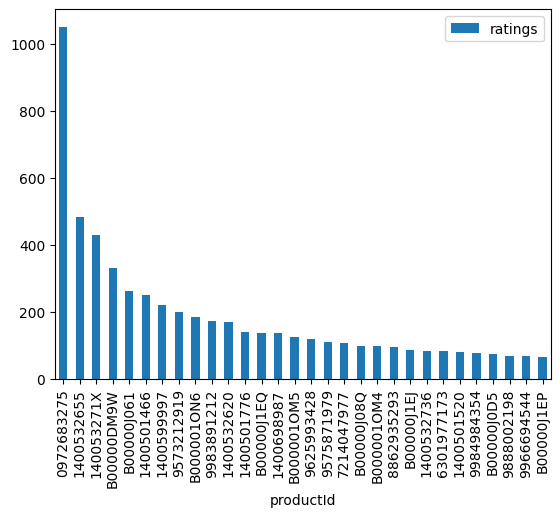

In [17]:
top.head(30).plot(kind = "bar")

In [18]:
# Number of unique user id  in the data
print('Number of unique users in Raw data = ', df['userId'].nunique())
# Number of unique product id  in the data
print('Number of unique product in Raw data = ', df['productId'].nunique())

Number of unique users in Raw data =  9826
Number of unique product in Raw data =  1304


Taking the subset of dataset to make it less sparse/ denser.

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='userId'>

Text(0.5, 0, 'User ID')

Text(0, 0.5, 'Number of Ratings')

Text(0.5, 1.0, 'Top 10 Users with the Most Ratings')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'A3LDPF5FMB782Z'),
  Text(1, 0, 'AT8TIN5JKHO2V'),
  Text(2, 0, 'A1TBH7Z4RK7PRK'),
  Text(3, 0, 'A39DZU4YRGKWAG'),
  Text(4, 0, 'A36V8NDDRZYRYO'),
  Text(5, 0, 'A3E7PG9CHDBICA'),
  Text(6, 0, 'A2YT1SH4B1PPST'),
  Text(7, 0, 'A2CARFAX5FNQT9'),
  Text(8, 0, 'A1BZ18U2EF4FAI'),
  Text(9, 0, 'A3JTWZNUVOL2K1')])

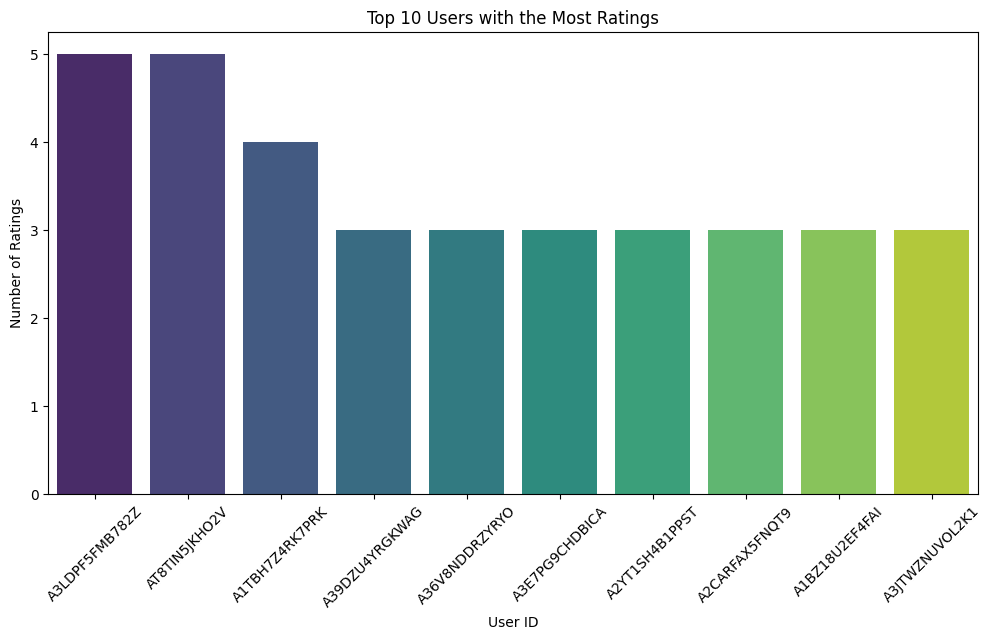

In [19]:
#Check the top 10 users based on ratings
# Group by userId to count the number of ratings per user and sort in descending order
most_rated = df.groupby('userId').size().sort_values(ascending=False)[:10]

# Plot the top 10 users with the most ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=most_rated.index, y=most_rated.values, palette='viridis')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.title('Top 10 Users with the Most Ratings')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='num_ratings', ylabel='mean_ratings'>

Text(0.5, 0, 'Number of Ratings')

Text(0, 0.5, 'Mean Rating')

Text(0.5, 1.0, 'Relationship between Number of Ratings and Mean Rating per Product')

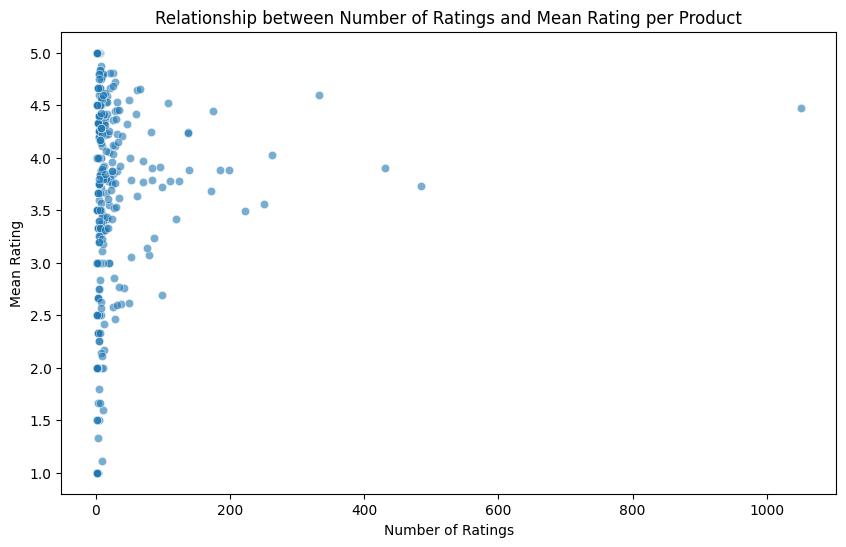

In [20]:
# Group by productId to calculate the number of ratings and mean ratings per product
product_ratings = df.groupby('productId').agg(
    num_ratings=('ratings', 'size'),
    mean_ratings=('ratings', 'mean')
).reset_index()

# Plot scatterplot to observe the relationship between number of ratings and mean rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_ratings, x='num_ratings', y='mean_ratings', alpha=0.6)

plt.xlabel('Number of Ratings')
plt.ylabel('Mean Rating')
plt.title('Relationship between Number of Ratings and Mean Rating per Product')
plt.show()

 Most of the users rated the products in the range of 4-5 stars.

In [21]:
# Create a mapping dictionary for user IDs
user_id_map = {old_user_id: idx + 1 for idx, old_user_id in enumerate(df['userId'].unique())}

# Update user IDs in the dataframe
df['userId'] = df['userId'].map(user_id_map)

# Example mapping for user IDs
print(df.head())


   userId   productId  ratings
0       1  0321732944      5.0
1       2  0439886341      1.0
2       3  0439886341      3.0
3       4  0439886341      1.0
4       5  0511189877      5.0


# **Collabarative Filtering**

User and Item based CF

In [22]:
# pip install surprise

**User based CF and Item Based CF**

In [23]:
from surprise import Dataset, Reader, KNNWithMeans
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict

# Step 1: Load data into Surprise's Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'productId', 'ratings']], reader)

In [24]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=0)

In [25]:
def train_knn_with_means(user_based=True):
    """ Train KNNWithMeans algorithm for user-based or item-based collaborative filtering """
    sim_options = {'name': 'pearson_baseline', 'user_based': user_based}
    algo = KNNWithMeans(k=5, sim_options=sim_options)
    algo.fit(trainset)
    return algo


In [26]:
def evaluate_model(algo):
    """ Evaluate the model on the testset and return RMSE and MAE """
    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    return rmse, mae


In [27]:
def precision_recall_at_k(predictions, k=5, threshold=4.0):
    """ Return precision and recall at k metrics for each user """
    user_est_true = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()

    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [28]:
def get_top_n_recommendations(algo, userId, n=5):
    """ Get top n recommendations for a user """
    all_items = df['productId'].unique()
    rated_items = df[df['userId'] == userId]['productId'].unique()
    predictions = [algo.predict(userId, item_id) for item_id in all_items if item_id not in rated_items]
    predictions.sort(key=lambda x: x.est, reverse=True)
    top_n_recommendations = predictions[:n]
    return top_n_recommendations


In [29]:
def recommend_for_multiple_users(algo, user_ids, num_recommendations=5):
    """ Recommend items for multiple users and print the recommendations """
    for user_id in user_ids:
        top_recommendations = get_top_n_recommendations(algo, user_id, num_recommendations)
        print(f'\nTop {num_recommendations} recommendations for user {user_id}:')
        for recommendation in top_recommendations:
            print(f'Product ID: {recommendation.iid}, Estimated Rating: {recommendation.est}')

**User Based**

In [30]:
# Train and evaluate user-based collaborative filtering model
print("Training user-based collaborative filtering model...")
user_based_algo = train_knn_with_means(user_based=True)
user_based_rmse, user_based_mae = evaluate_model(user_based_algo)


# Calculate precision and recall
predictions = user_based_algo.test(testset)
precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4.0)

# Print average precision and recall

precision= sum(precisions.values()) / len(precisions)
recall=sum(recalls.values()) / len(recalls)
print(f'Precision: ',precision)
print(f'Recall: ',recall)

# Calculate F1 score
f1_scores =  2 * (precision * recall) / (precision + recall)
print(f'F1 Score: {f1_scores}')


Training user-based collaborative filtering model...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4644
MAE:  1.2083
Precision:  0.9979949874686717
Recall:  0.29172932330827067
F1 Score: 0.4514831579531806


In [31]:
# Example: Recommend items for multiple users using user-based model
user_ids = [56, 93, 121]
print("\nUser-based Recommendations:")
recommend_for_multiple_users(user_based_algo, user_ids, num_recommendations=5)


User-based Recommendations:

Top 5 recommendations for user 56:
Product ID: 0321732944, Estimated Rating: 3.91325
Product ID: 0439886341, Estimated Rating: 3.91325
Product ID: 0511189877, Estimated Rating: 3.91325
Product ID: 0528881469, Estimated Rating: 3.91325
Product ID: 0558835155, Estimated Rating: 3.91325

Top 5 recommendations for user 93:
Product ID: 0439886341, Estimated Rating: 4.0
Product ID: 0511189877, Estimated Rating: 4.0
Product ID: 0528881469, Estimated Rating: 4.0
Product ID: 0558835155, Estimated Rating: 4.0
Product ID: 059400232X, Estimated Rating: 4.0

Top 5 recommendations for user 121:
Product ID: 0321732944, Estimated Rating: 3.91325
Product ID: 0439886341, Estimated Rating: 3.91325
Product ID: 0511189877, Estimated Rating: 3.91325
Product ID: 0528881469, Estimated Rating: 3.91325
Product ID: 0558835155, Estimated Rating: 3.91325


**Item Based**

In [32]:
# Train and evaluate item-based collaborative filtering model
print("Training item-based collaborative filtering model...")
item_based_algo = train_knn_with_means(user_based=False)
item_based_rmse, item_based_mae = evaluate_model(item_based_algo)


# Calculate precision and recall
predictions = item_based_algo.test(testset)
precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4.0)

# Print average precision and recall

precision= sum(precisions.values()) / len(precisions)
recall=sum(recalls.values()) / len(recalls)
print(f'Precision: ',precision)
print(f'Recall: ',recall)

# Calculate F1 score
f1_scores =  2 * (precision * recall) / (precision + recall)
print(f'F1 Score: {f1_scores}')

Training item-based collaborative filtering model...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 1.4631
MAE:  1.2141
Precision:  0.9979949874686717
Recall:  0.2857142857142857
F1 Score: 0.44424610922072855


In [33]:
# Example: Recommend items for multiple users using item-based model
print("\nItem-based Recommendations:")
recommend_for_multiple_users(item_based_algo, user_ids, num_recommendations=5)


Item-based Recommendations:

Top 5 recommendations for user 56:
Product ID: 0321732944, Estimated Rating: 3.91325
Product ID: 0439886341, Estimated Rating: 3.91325
Product ID: 0511189877, Estimated Rating: 3.91325
Product ID: 0528881469, Estimated Rating: 3.91325
Product ID: 0558835155, Estimated Rating: 3.91325

Top 5 recommendations for user 93:
Product ID: 059400232X, Estimated Rating: 5
Product ID: 0594033934, Estimated Rating: 5
Product ID: 0594287995, Estimated Rating: 5
Product ID: 0594296420, Estimated Rating: 5
Product ID: 0594450209, Estimated Rating: 5

Top 5 recommendations for user 121:
Product ID: 0321732944, Estimated Rating: 3.91325
Product ID: 0439886341, Estimated Rating: 3.91325
Product ID: 0511189877, Estimated Rating: 3.91325
Product ID: 0528881469, Estimated Rating: 3.91325
Product ID: 0558835155, Estimated Rating: 3.91325


 **SVD: Matrix Factorization Based Algorithm**

In [66]:
from surprise import SVD, Reader, Dataset
from surprise.model_selection import cross_validate

In [67]:
svd = SVD()

In [68]:
reader = Reader()

In [69]:
data = Dataset.load_from_df(df[['userId', 'productId', 'ratings']], reader)

run 5-fold cross-validation and print the results.

In [70]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4104  1.3835  1.3987  1.4066  1.4166  1.4032  0.0114  
MAE (testset)     1.1610  1.1211  1.1567  1.1490  1.1565  1.1489  0.0144  
Fit time          0.21    0.20    0.20    0.21    0.20    0.20    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([1.41041606, 1.38352767, 1.398734  , 1.40664626, 1.41659697]),
 'test_mae': array([1.16100557, 1.12107629, 1.15673395, 1.14904412, 1.15646543]),
 'fit_time': (0.2074897289276123,
  0.19685149192810059,
  0.2021474838256836,
  0.20674800872802734,
  0.19597196578979492),
 'test_time': (0.011667966842651367,
  0.009282350540161133,
  0.010909557342529297,
  0.008801698684692383,
  0.0092620849609375)}

In [71]:
trainset = data.build_full_trainset()

In [72]:
svd.fit(trainset)

In [76]:
df.head()

,userId,productId,ratings
0,1,0321732944,5.0
1,2,0439886341,1.0
2,3,0439886341,3.0
3,4,0439886341,1.0
4,5,0511189877,5.0


In [77]:
df[df['userId'] == '1']

,userId,productId,ratings


In [81]:
svd.predict(uid='1', iid='0321732944', r_ui=None).est

4.0076205632071735

Our model predicts that userId of 1 will give 4 as the rating for productId of '0321732944'.

# **Model Based Collabarative Filtering**

These methods are based on machine learning and data mining techniques. The goal is to train models to be able to make predictions. For example, we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most. One advantage of these methods is that they are able to recommend a larger number of items to a larger number of users, compared to other methods like memory based approach. They have large coverage, even when working with large sparse matrices.

In [34]:
df.head()

,userId,productId,ratings
0,1,0321732944,5.0
1,2,0439886341,1.0
2,3,0439886341,3.0
3,4,0439886341,1.0
4,5,0511189877,5.0


In [35]:
ratings_matrix = df.pivot_table(values='ratings', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,0594033896,...,B00000J1DN,B00000J1DT,B00000J1E6,B00000J1EC,B00000J1EJ,B00000J1EP,B00000J1EQ,B00000J1ES,B00000J1EZ,B00000J1F3
userId,,,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The utility matrix obtaned above is sparse,and unknown values are filled with with 0

In [36]:
ratings_matrix.shape

(9826, 1304)

Transpose the matrix

In [37]:
X = ratings_matrix.T
X.head()

userId,1,2,3,4,5,6,7,8,9,10,...,9817,9818,9819,9820,9821,9822,9823,9824,9825,9826
productId,,,,,,,,,,,,,,,,,,,,,
0321732944,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0439886341,0,1,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0511189877,0,0,0,0,5,2,5,5,5,5,...,0,0,0,0,0,0,0,0,0,0
0528881469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558835155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X.shape

(1304, 9826)

In [39]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(1304, 10)

In [40]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1304, 1304)

In [41]:
i = "B00000J08Q"
product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

1261

In [42]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(1304,)

Recommending top 25 highly correlated products in sequence

In [43]:
Recommend = list(X.index[correlation_product_ID > 0.75])

# Removes the item already bought by the customer
Recommend.remove(i)

Recommend

['0594296420',
 '0594549507',
 '1400599997',
 '161552763X',
 '1615527656',
 '3993854705',
 '4515637851',
 '6025005559',
 '6374625781',
 '6465354276',
 '7204079302',
 '7228061829',
 '787987965X',
 '7884139057',
 '8862935358',
 '8866133019',
 '8918010656',
 '9148619841',
 '962084971X',
 '975266119X',
 '9752890474',
 '9875847194',
 '9876108980',
 '9966263632',
 '9966279946',
 '9966292020',
 '9966298932',
 '9966389199',
 '9966519610',
 '9966540318',
 '9966559760',
 '9966624805',
 '9967221771',
 '9967229314',
 '9981724246',
 '9981734241',
 '9981738751',
 '9983729768',
 '998374130X',
 '9983763990',
 '9983805383',
 '9983886030',
 '9984913570',
 '9984970590',
 '9984984710',
 '998499659X',
 '9985022807',
 '9985511298',
 '9985540174',
 '9985574095',
 '9985580443',
 '9985610016',
 '9985617827',
 '9985622456',
 '9985622812',
 '998566891X',
 '9985680138',
 '998569824X',
 '9985699696',
 '9985726391',
 '9985728939',
 '9985735641',
 '9985737830',
 '9985791452',
 '9985799399',
 '9985975413',
 '99893586

# **Hybrid**

In [61]:
# Function that takes in productId and useId as input and outputs up to 5 most similar products.
def hybrid_recommendations(userId, productId):

    # Get the Id of the top five products that are correlated with the ProductId chosen by the user.
    top_five=ratings_matrix.corrwith(ratings_matrix[productId]).sort_values(ascending=False).head(5)

    # Predict the ratings the user might give to these top 5 most correlated products.
    est_rating=[]
    for x in list(top_five.index):
        if str(top_five[x])!='0':
            est_rating.append(svd.predict(userId, iid=x, r_ui=None).est)

    return pd.DataFrame({'productId':list(top_five.index)[:len(est_rating)], 'estimated_rating':est_rating}).sort_values(by='estimated_rating', ascending=False).reset_index(drop=True)

In [82]:
hybrid_recommendations('1', '0321732944')

,productId,estimated_rating
0,0594549558,4.014947
1,0594287995,4.014470
2,0594514789,4.012993
3,0594450705,4.010448
4,0321732944,4.007621


# **Popularity Recommender model**

In [44]:
#Count of user_id for each unique product as recommendation score
df2 = df.groupby('productId').agg({'userId': 'count'}).reset_index()
df2.rename(columns = {'userId': 'score'},inplace=True)
df2.head(20)

,productId,score
0,0321732944,1
1,0439886341,3
2,0511189877,6
3,0528881469,27
4,0558835155,1
5,059400232X,3
6,0594012015,8
7,0594017343,1
8,0594017580,1
9,0594033896,5


In [45]:
#Sort the products on recommendation score
df_sort = df2.sort_values(['score', 'productId'], ascending = [0,1])

#Generate a recommendation rank based upon score
df_sort['rank'] = df_sort['score'].rank(ascending=0, method='first')

#Get the top 5 recommendations
popularity_recommendations = df_sort.head(5)
popularity_recommendations

,productId,score,rank
37,0972683275,1051,1.0
59,1400532655,484,2.0
60,140053271X,431,3.0
1228,B00000DM9W,332,4.0
1257,B00000J061,262,5.0


In [46]:
# Use popularity based recommender model to make predictions
def recommend(user_id):
    user_recommendations = popularity_recommendations

    #Add user_id column for which the recommendations are being generated
    user_recommendations['userId'] = user_id

    #Bring user_id column to the front
    cols = user_recommendations.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols]

    return user_recommendations

In [47]:
find_recom = [70,140,17]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))
    print("\n")

The list of recommendations for the userId: 70

      userId   productId  score  rank
37        70  0972683275   1051   1.0
59        70  1400532655    484   2.0
60        70  140053271X    431   3.0
1228      70  B00000DM9W    332   4.0
1257      70  B00000J061    262   5.0


The list of recommendations for the userId: 140

      userId   productId  score  rank
37       140  0972683275   1051   1.0
59       140  1400532655    484   2.0
60       140  140053271X    431   3.0
1228     140  B00000DM9W    332   4.0
1257     140  B00000J061    262   5.0


The list of recommendations for the userId: 17

      userId   productId  score  rank
37        17  0972683275   1051   1.0
59        17  1400532655    484   2.0
60        17  140053271X    431   3.0
1228      17  B00000DM9W    332   4.0
1257      17  B00000J061    262   5.0




* Since, it is a Popularity recommender model, so, all the three users are given the same recommendations. Here, we predict the products based on the popularity. It is not personalized to particular user. It is a non-personalized recommender system.

# Summarising insights.

## **Collabarative Filtering**
It gives recommendation based on that people like things similar to other things they like, and things that are liked by other people with similar taste We used both a) User based b) Item based

1)User based metrics:

  
    RMSE: 1.4644

    MAE:  1.2083

    Precision: 0.9979949874686717

    Recall: 0.29172932330827067

    F1 Score: 0.4514831579531806

2)Item Based evaluation metrics:

    
    RMSE: 1.4631
    
    MAE:  1.2141
    
    Precision: 0.9979949874686717
    
    Recall: 0.2857142857142857

    F1 Score: 0.44424610922072855

  **Overall Conclusion:**

    RMSE and MAE: Both models are very close in terms of RMSE and MAE, with the item-based model having a slight edge in RMSE and the user-based model having a slight edge in MAE.

    Precision: Both models Use based and Item based have the same precision.

    Recall: The user-based model has a slightly better recall.


3)SVD

Used the powerful Surprise Library to build a collaborative filter based on single value decomposition. The RMSE obtained was about 1.38  amd MAE 1.12 and the engine predicted estimated ratings for a given user and product.


---


## **Model-based Collaborative Filtering**
It is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.


---
##**Hybrid**
Hybrid Engine: We combined corrwith() method which computed the Pearson correlation coefficients with collaborative filtering. Our hybrid recommender took useId and productId as input and suggested up to 5 products that were similar to the input productId based on the estimated ratings that was internally calculated for the input userId. This Hybrid System took advantage of both Pearson method and Collaborative filtering and therefore made reliable predictions.

---

##**The Popularity-based recommender system**
It is a non-personalised recommender system and these are based on frequecy counts, which may be not suitable to the user.We can see the difference above for the different user Ids, The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history.